%matplotlib inline
Python for Data science Project on energy consumptions in Smart homes


Week 1:Data Cleaning 
Task 1
Importing the required libraries and packages


In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import os


In [2]:
#Loading the dataset
df=pd.read_csv(r'C:\Users\Intel\Downloads\smart_home_energy_consumption.csv')
print(df)

                  Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0     14-03-2024 06:00   Home_8    Lucknow                    3.14          1   
1     06-04-2024 06:00   Home_9  Hyderabad                    4.70          1   
2     30-01-2024 13:00   Home_4    Lucknow                    2.27          0   
3     05-03-2024 12:00   Home_5  Ahmedabad                    0.80          0   
4     19-01-2024 00:00  Home_10    Kolkata                    2.43          0   
...                ...      ...        ...                     ...        ...   
2495  17-02-2024 14:00   Home_5    Kolkata                    5.46          1   
2496  09-03-2024 04:00   Home_6    Chennai                    1.92          1   
2497  17-03-2024 17:00   Home_2    Lucknow                    3.71          1   
2498  06-02-2024 12:00   Home_6    Lucknow                    3.88          0   
2499  02-03-2024 01:00   Home_9  Bangalore                    0.82          1   

      Temperature_C  Humidi

In [3]:
#Understanding the structure and features of the dataset
df.head()

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  14-03-2024 06:00   Home_8    Lucknow                    3.14          1   
1  06-04-2024 06:00   Home_9  Hyderabad                    4.70          1   
2  30-01-2024 13:00   Home_4    Lucknow                    2.27          0   
3  05-03-2024 12:00   Home_5  Ahmedabad                    0.80          0   
4  19-01-2024 00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3                   0.55  
4                   0.94

In [4]:
df.tail()

Date Home_ID       City  Energy_Consumption_kWh  Occupancy  \
2495  17-02-2024 14:00  Home_5    Kolkata                    5.46          1   
2496  09-03-2024 04:00  Home_6    Chennai                    1.92          1   
2497  17-03-2024 17:00  Home_2    Lucknow                    3.71          1   
2498  06-02-2024 12:00  Home_6    Lucknow                    3.88          0   
2499  02-03-2024 01:00  Home_9  Bangalore                    0.82          1   

      Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
2495          15.74       62.45            1.24               1.70   
2496          27.02       40.91            0.96               1.26   
2497          29.87       59.02            1.45               0.60   
2498          23.76       60.23            0.86               0.60   
2499          28.19       65.21            2.01              -0.02   

      Electronics_Usage_kWh  
2495                   0.49  
2496                   0.21  
2497                   1.00  
2498                   0.44  
2499                  -0.18

In [5]:
df.shape #Has 2500 rows and 10 columns

(2500, 10)

In [6]:
df.info() #Reads and gives basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2450 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2450 non-null   float64
 6   Humidity_%              2450 non-null   float64
 7   HVAC_Usage_kWh          2450 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB


In [7]:
df.dtypes

Date                       object
Home_ID                    object
City                       object
Energy_Consumption_kWh    float64
Occupancy                   int64
Temperature_C             float64
Humidity_%                float64
HVAC_Usage_kWh            float64
Kitchen_Usage_kWh         float64
Electronics_Usage_kWh     float64
dtype: object

In [8]:
df.describe() #Describes the statistical forms of the features

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2450.000000  2500.000000    2450.000000  2450.000000   
mean                 3.515151     0.696000      23.949718    59.877824   
std                  1.373759     0.460075       5.245470    14.790739   
min                 -0.670000     0.000000       7.260000     8.190000   
25%                  2.680000     0.000000      20.432500    49.725000   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.310000     1.000000      27.450000    69.770000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2450.000000        2500.000000            2500.000000  
mean         1.009151           0.799344               0.510372  
std          0.508385           0.405211               0.297242  
min         -1.030000          -0.650000              -0.560000  
25%          0.670000           0.520000               0.310000  
50%          1.020000           0.810000               0.510000  
75%          1.360000           1.080000               0.710000  
max          2.550000           2.310000               1.570000

In [9]:
df.isnull().values.any() #Checks if there are any null values

True

In [10]:
df.isnull().sum().sum() #Returns sum of null values

200

In [11]:
df.isnull().sum() #columns which contain null values

Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64

In [12]:
df.fillna(df['Temperature_C'].mean(),inplace=True) #replacing null values with mean of the respective column


In [13]:
df.isnull().sum()

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64

In [14]:
df.head()

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  14-03-2024 06:00   Home_8    Lucknow                    3.14          1   
1  06-04-2024 06:00   Home_9  Hyderabad                    4.70          1   
2  30-01-2024 13:00   Home_4    Lucknow                    2.27          0   
3  05-03-2024 12:00   Home_5  Ahmedabad                    0.80          0   
4  19-01-2024 00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3                   0.55  
4                   0.94

In [15]:
df.tail()

Date Home_ID       City  Energy_Consumption_kWh  Occupancy  \
2495  17-02-2024 14:00  Home_5    Kolkata                    5.46          1   
2496  09-03-2024 04:00  Home_6    Chennai                    1.92          1   
2497  17-03-2024 17:00  Home_2    Lucknow                    3.71          1   
2498  06-02-2024 12:00  Home_6    Lucknow                    3.88          0   
2499  02-03-2024 01:00  Home_9  Bangalore                    0.82          1   

      Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
2495          15.74       62.45            1.24               1.70   
2496          27.02       40.91            0.96               1.26   
2497          29.87       59.02            1.45               0.60   
2498          23.76       60.23            0.86               0.60   
2499          28.19       65.21            2.01              -0.02   

      Electronics_Usage_kWh  
2495                   0.49  
2496                   0.21  
2497                   1.00  
2498                   0.44  
2499                  -0.18

In [16]:
df.isnull().values.any()

False

In [17]:
df.iloc[:,0:5] #subset or slice of Dataframe

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy
0     14-03-2024 06:00   Home_8    Lucknow                    3.14          1
1     06-04-2024 06:00   Home_9  Hyderabad                    4.70          1
2     30-01-2024 13:00   Home_4    Lucknow                    2.27          0
3     05-03-2024 12:00   Home_5  Ahmedabad                    0.80          0
4     19-01-2024 00:00  Home_10    Kolkata                    2.43          0
...                ...      ...        ...                     ...        ...
2495  17-02-2024 14:00   Home_5    Kolkata                    5.46          1
2496  09-03-2024 04:00   Home_6    Chennai                    1.92          1
2497  17-03-2024 17:00   Home_2    Lucknow                    3.71          1
2498  06-02-2024 12:00   Home_6    Lucknow                    3.88          0
2499  02-03-2024 01:00   Home_9  Bangalore                    0.82          1

[2500 rows x 5 columns]

In [18]:
df.iloc[0:5,:]

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  14-03-2024 06:00   Home_8    Lucknow                    3.14          1   
1  06-04-2024 06:00   Home_9  Hyderabad                    4.70          1   
2  30-01-2024 13:00   Home_4    Lucknow                    2.27          0   
3  05-03-2024 12:00   Home_5  Ahmedabad                    0.80          0   
4  19-01-2024 00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3                   0.55  
4                   0.94

In [19]:
df.sample(n=100) #Gives random samples of the dataframe

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
2439  18-01-2024 12:00   Home_4    Chennai                    3.34          1   
284   02-04-2024 06:00  Home_10    Kolkata                    3.78          1   
1961  13-01-2024 12:00   Home_5     Jaipur                    3.75          0   
1488  17-03-2024 06:00   Home_1      Delhi                    3.72          1   
1360  02-01-2024 19:00   Home_9    Lucknow                    6.40          1   
...                ...      ...        ...                     ...        ...   
1629  29-03-2024 10:00   Home_5  Hyderabad                    3.61          1   
2158  11-02-2024 12:00  Home_10    Kolkata                    4.16          0   
502   30-01-2024 04:00   Home_7      Delhi                    4.44          1   
2089  19-03-2024 00:00   Home_5    Kolkata                    3.89          1   
793   02-03-2024 14:00  Home_10     Mumbai                    3.34          1   

      Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
2439          15.83       81.42            1.20               1.03   
284           30.52       58.92            1.29               0.19   
1961          29.98       70.99            0.96               0.80   
1488          24.44       64.78            1.21               0.86   
1360          23.80       67.21            1.51               1.20   
...             ...         ...             ...                ...   
1629          25.94       72.16           -1.03               0.41   
2158          29.57       65.58            2.11               0.96   
502           25.12       67.19            1.20               0.16   
2089          19.00       52.82            1.27               0.29   
793           28.13       67.22            1.43               0.71   

      Electronics_Usage_kWh  
2439                   1.09  
284                    0.39  
1961                   0.70  
1488                   0.19  
1360                   0.37  
...                     ...  
1629                   0.77  
2158                   0.14  
502                   -0.01  
2089                   0.35  
793                    0.73  

[100 rows x 10 columns]

In [20]:
#Outliers detection
x=df['Energy_Consumption_kWh']
y=df['Temperature_C']
np.cov(x,y) #Returns the covariance of both columns in the form of array and can be esily understood the relation


    

array([[10.03713229,  0.1375232 ],
       [ 0.1375232 , 26.96443214]])

<Figure size 1200x600 with 0 Axes>

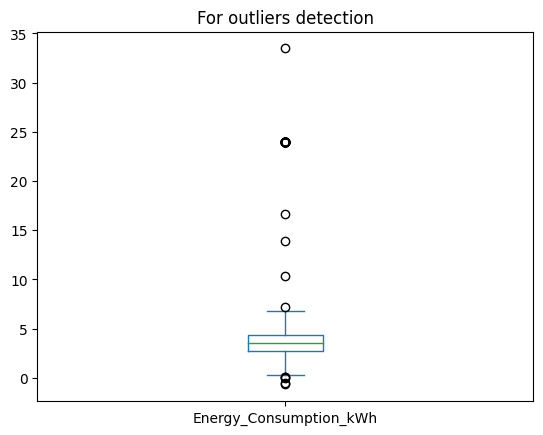

In [21]:
#Plotting the graphs to understand and detect outliers
cols=['Energy_Consumption_kWh']
plt.figure(figsize=(12,6))
df[cols].plot(kind='box')
plt.title("For outliers detection")
plt.show()

<Figure size 1200x600 with 0 Axes>

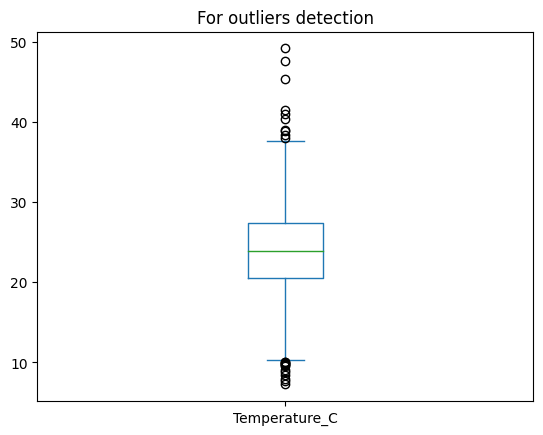

In [22]:
#For temperature column
cols=['Temperature_C']
plt.figure(figsize=(12,6))
df[cols].plot(kind='box')
plt.title("For outliers detection")
plt.show()

array([[<Axes: title={'center': 'Energy_Consumption_kWh'}>]], dtype=object)

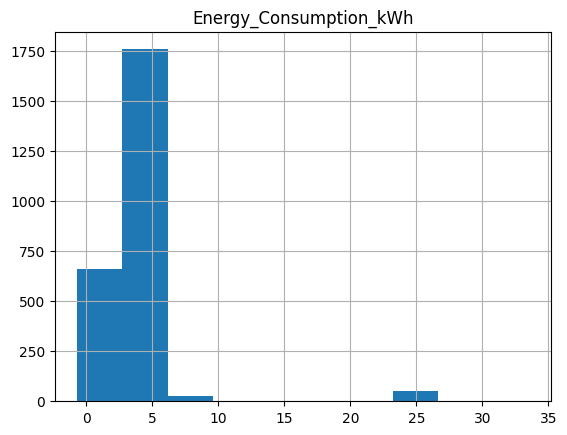

In [23]:
df.hist(column='Energy_Consumption_kWh') #Histogram for detecting outliers

array([[<Axes: title={'center': 'Temperature_C'}>]], dtype=object)

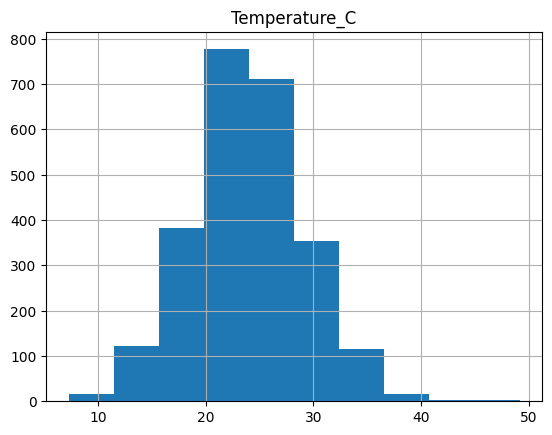

In [24]:
df.hist(column='Temperature_C')

In [25]:
gdf=df.groupby(['Energy_Consumption_kWh','Temperature_C'])

In [26]:
gdf.groups #using the groups method ,grouped the energy and temperature 

{(-0.67, 32.31): [829], (-0.49, 29.1): [561], (0.02, 21.91): [1622], (0.05, 20.38): [2406], (0.1, 27.48): [25], (0.23, 30.32): [1572], (0.28, 23.2): [108], (0.3, 22.09): [189], (0.33, 17.79): [2114], (0.33, 33.87): [511], (0.35, 21.21): [1977], (0.39, 29.95): [1343], (0.43, 28.6): [811], (0.49, 21.14): [2193], (0.5, 26.97): [412], (0.6, 17.02): [1630], (0.61, 31.75): [1849], (0.62, 25.79): [1275], (0.63, 21.89): [429], (0.65, 28.55): [2027], (0.66, 22.18): [2419], (0.7, 16.56): [2248], (0.71, 26.01): [924], (0.73, 19.24): [1725], (0.77, 14.69): [1086], (0.77, 29.63): [102], (0.79, 27.61): [1553], (0.8, 23.3): [3], (0.81, 15.14): [2171], (0.82, 20.26): [1532], (0.82, 28.19): [2499], (0.85, 18.56): [2068], (0.85, 26.09): [1499], (0.85, 26.11): [496], (0.88, 21.89): [1461], (0.9, 22.74): [604], (0.91, 22.25): [2355], (0.91, 23.94971836734694): [413], (0.93, 20.81): [2260], (0.93, 24.09): [1162], (0.96, 16.27): [1015], (0.98, 23.13): [2212], (0.99, 25.96): [2099], (1.0, 35.22): [1245], (1.

In [27]:
gdf.size() #gives range and values of these two features

Energy_Consumption_kWh  Temperature_C
-0.670000               32.31            1
-0.490000               29.10            1
 0.020000               21.91            1
 0.050000               20.38            1
 0.100000               27.48            1
                                        ..
 23.949718              30.42            1
                        30.45            1
                        30.57            1
                        32.93            1
 33.480000              32.68            1
Length: 2487, dtype: int64

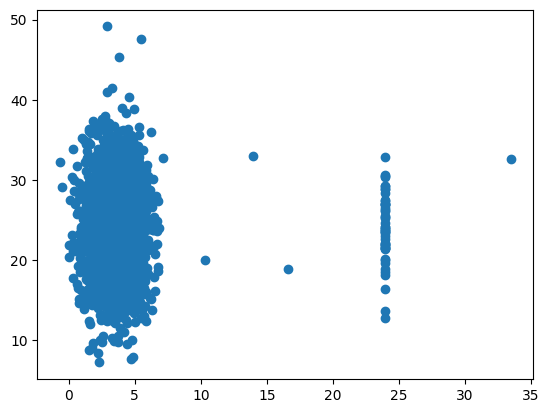

In [28]:
#Using scatter plot to better understand the relation between these two columns
plt.scatter(df['Energy_Consumption_kWh'],df['Temperature_C'])
plt.show()

In [29]:
#Using log transformation method to remove the outliers
df['Energy_Consumption_kWh']=np.log(df['Energy_Consumption_kWh'] + 1)  # Adding 1 to avoid log(0)


Text(0.5, 1.0, 'Log Transformed Data')

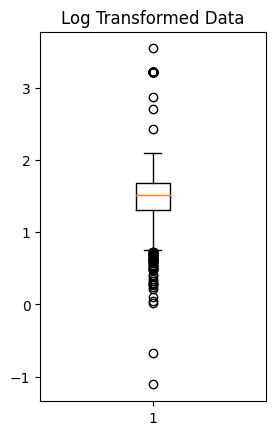

In [30]:
plt.subplot(1, 2, 2)
plt.boxplot(df['Energy_Consumption_kWh'])
plt.title('Log Transformed Data')

In [31]:
#log tranformation
df['Temperature_C'] = np.log(df['Temperature_C'] + 1)  # Adding 1 to avoid log(0)


Text(0.5, 1.0, 'Log Transformed Data')

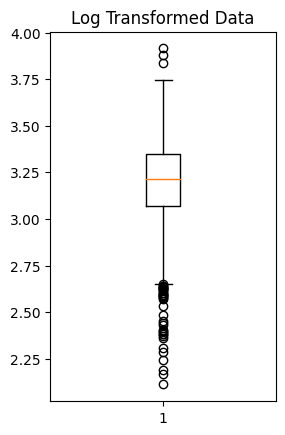

In [32]:
plt.subplot(1, 2, 2)
plt.boxplot(df['Temperature_C'])
plt.title('Log Transformed Data')

In [33]:
#Setting the upper limit for plotting
upper_bound=3
df['Energy_Consumption_kWh'] = np.where(df['Energy_Consumption_kWh'] > upper_bound, df['Energy_Consumption_kWh'].mean(), df['Energy_Consumption_kWh'])


In [34]:
upper_bound=3.75
df['Temperature_C'] = np.where(df['Temperature_C'] > upper_bound, df['Temperature_C'].mean(), df['Temperature_C'])


Text(0, 0.5, 'Frequency')

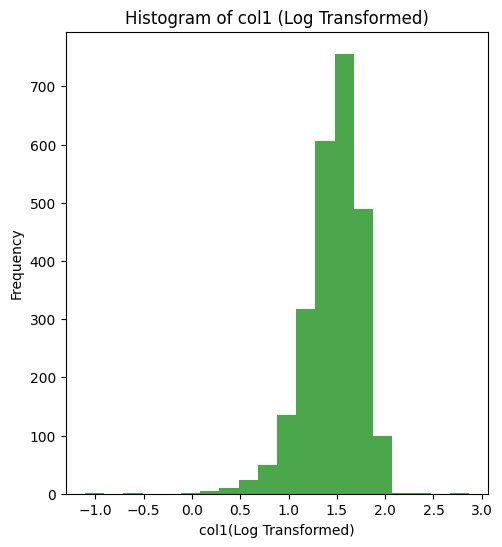

In [35]:
plt.figure(figsize=(12,6))

# Plot histogram of the first column
plt.subplot(1, 2, 1)
plt.hist(df['Energy_Consumption_kWh'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of col1 (Log Transformed)')
plt.xlabel('col1(Log Transformed)')
plt.ylabel('Frequency')

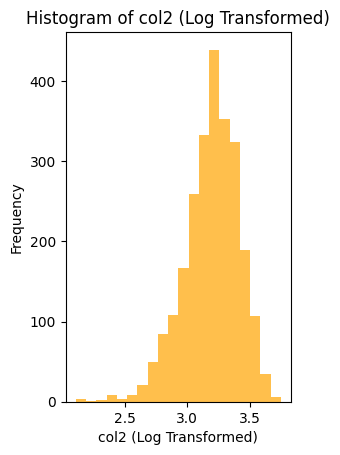

In [36]:
# Plot histogram of the second column
plt.subplot(1, 2, 2)
plt.hist(df['Temperature_C'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of col2 (Log Transformed)')
plt.xlabel('col2 (Log Transformed)')
plt.ylabel('Frequency')

plt.show()

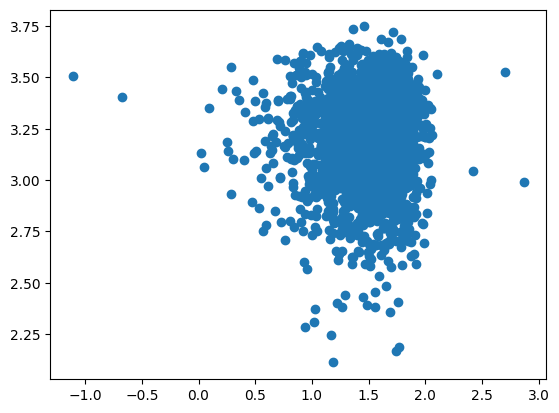

In [37]:
#After Transformed
plt.scatter(df['Energy_Consumption_kWh'],df['Temperature_C'])
plt.show()

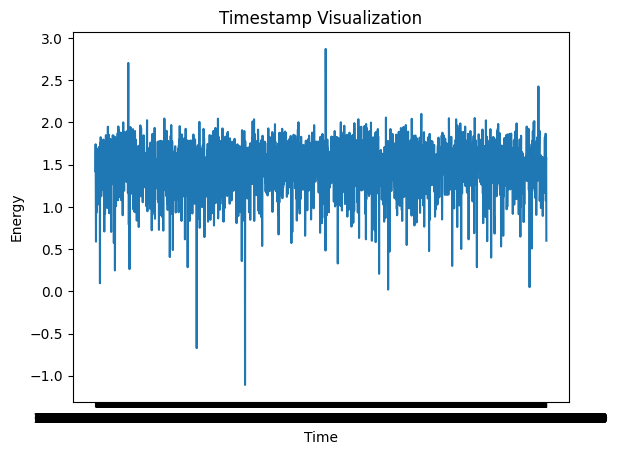

In [38]:
#With time how much energy is consumed (visualizing)
plt.plot(df['Date'], df['Energy_Consumption_kWh'])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Timestamp Visualization')
plt.show()

In [39]:
#Normalization
#To normalize the specific features we are using zscore by importing it from scipy package
from scipy.stats import zscore
appliance_normalize=['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']


(array([[2.000e+00, 0.000e+00, 6.000e+00, 4.300e+01, 3.460e+02, 1.462e+03,
         6.380e+02, 1.000e+00, 2.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.450e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 5.000e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 4.630e+02, 1.345e+03,
         6.540e+02, 2.000e+01, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01, 4.370e+02, 1.403e+03,
         6.110e+02, 2.800e+01, 0.000e+00, 0.000e+00]]),
 array([-8.71198186, -7.14921957, -5.58645728, -4.023695  , -2.46093271,
        -0.89817042,  0.66459186,  2.22735415,  3.79011644,  5.35287872,
         6.91564101]),
 <a list of 4 BarContainer objects>)

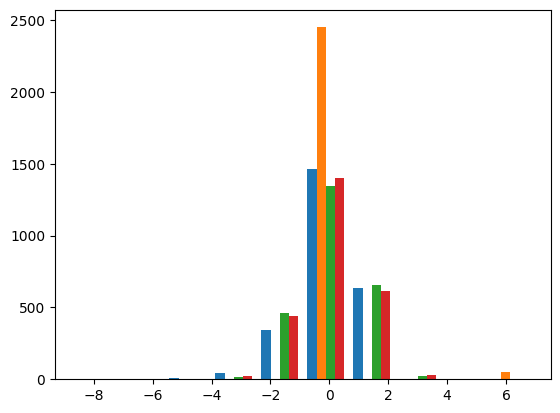

In [40]:
#Visualizing the normalization
zscore_data=df.copy()
zscore_data[appliance_normalize]=zscore_data[appliance_normalize].apply(zscore)
df_normalize=zscore_data[appliance_normalize]
plt.hist(zscore_data[appliance_normalize])

Week 2 : Exploratory Data Analysis & visualization
Task 1
Univariate analysis
Bivariate,multivariate analysis 


In [41]:
#Univariate Analysis of Energy consumption and plotting boxplot and histogram for more understanding 
df['Energy_Consumption_kWh'].describe()

count    2500.000000
mean        1.464818
std         0.295455
min        -1.108663
25%         1.308333
50%         1.499972
75%         1.665818
max         2.869602
Name: Energy_Consumption_kWh, dtype: float64

<Axes: >

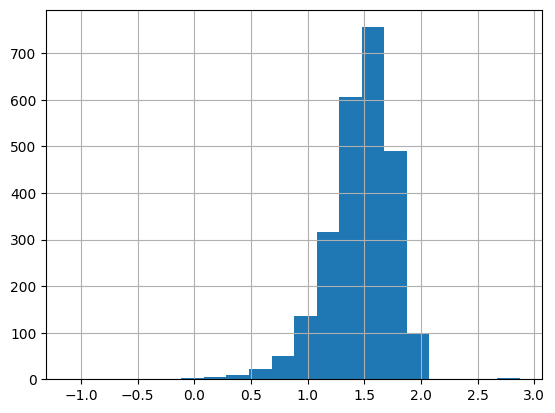

In [42]:
df['Energy_Consumption_kWh'].hist(bins=20)

<Axes: ylabel='Energy_Consumption_kWh'>

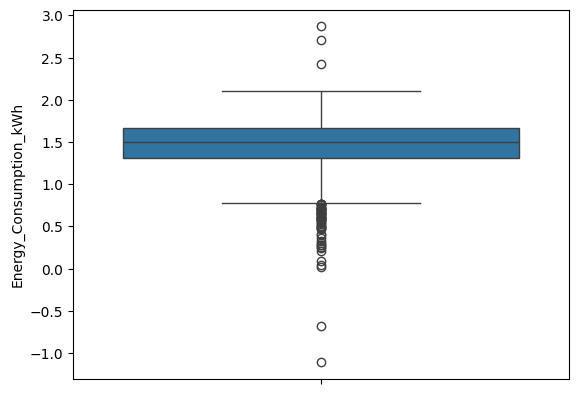

In [43]:
import seaborn as sns
sns.boxplot(df['Energy_Consumption_kWh'])

In [44]:
#Univariate Analysis of Temperature and plotting boxplot and histogram for more understanding 
df['Temperature_C'].describe()

count    2500.000000
mean        3.193067
std         0.218030
min         2.111425
25%         3.068402
50%         3.216863
75%         3.345420
max         3.748091
Name: Temperature_C, dtype: float64

<Axes: >

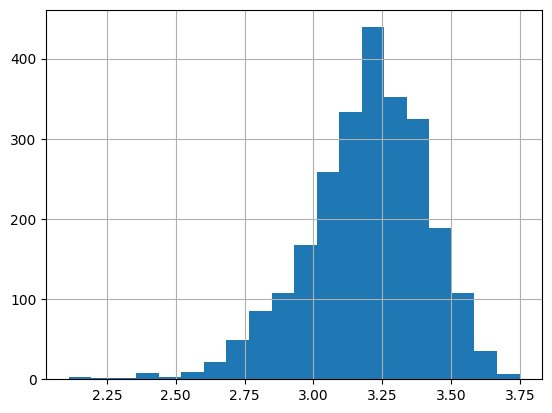

In [45]:
df['Temperature_C'].hist(bins=20)

<Axes: ylabel='Temperature_C'>

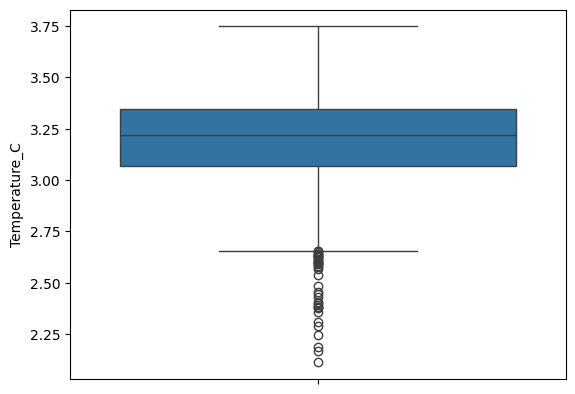

In [46]:
sns.boxplot(df['Temperature_C'])

In [47]:
#Univariate Analysis of appliances usage columns and plotting boxplot and histogram for more understanding 
df['HVAC_Usage_kWh'].describe()

count    2500.000000
mean        1.467962
std         3.251507
min        -1.030000
25%         0.680000
50%         1.030000
75%         1.390000
max        23.949718
Name: HVAC_Usage_kWh, dtype: float64

<Axes: >

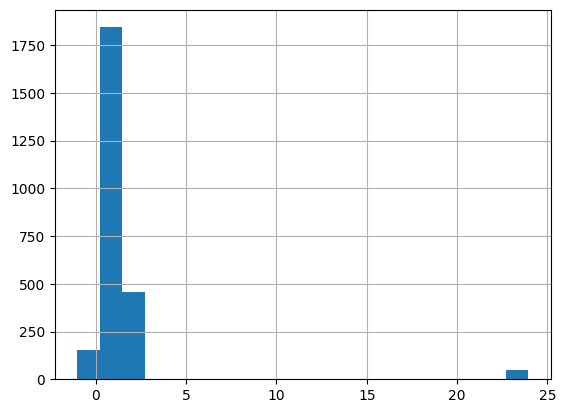

In [48]:
df['HVAC_Usage_kWh'].hist(bins=20)

<Axes: ylabel='HVAC_Usage_kWh'>

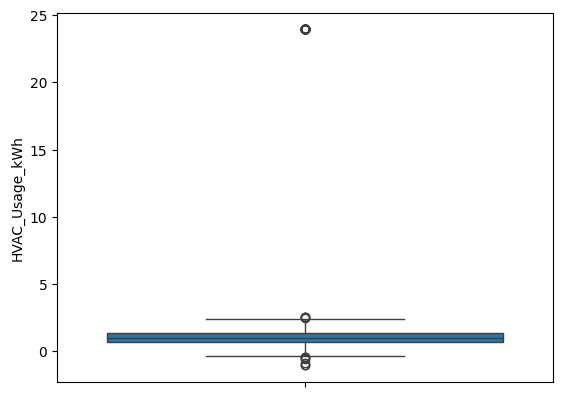

In [49]:
sns.boxplot(df['HVAC_Usage_kWh'])

In [50]:
df['Kitchen_Usage_kWh'].describe()

count    2500.000000
mean        0.799344
std         0.405211
min        -0.650000
25%         0.520000
50%         0.810000
75%         1.080000
max         2.310000
Name: Kitchen_Usage_kWh, dtype: float64

<Axes: >

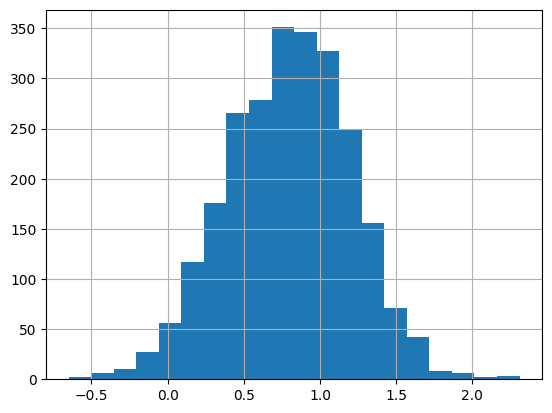

In [51]:
df['Kitchen_Usage_kWh'].hist(bins=20)


<Axes: ylabel='Kitchen_Usage_kWh'>

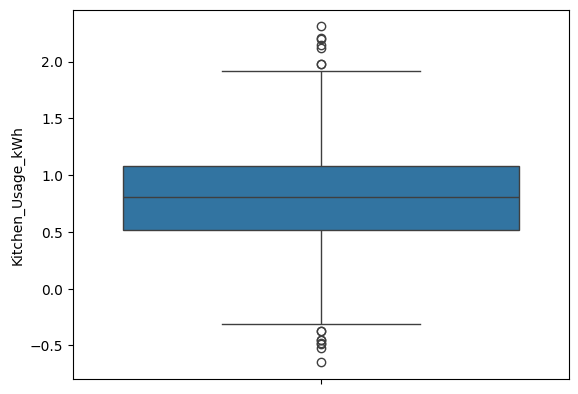

In [52]:
sns.boxplot(df['Kitchen_Usage_kWh'])

In [53]:
df['Electronics_Usage_kWh'].describe()

count    2500.000000
mean        0.510372
std         0.297242
min        -0.560000
25%         0.310000
50%         0.510000
75%         0.710000
max         1.570000
Name: Electronics_Usage_kWh, dtype: float64

<Axes: >

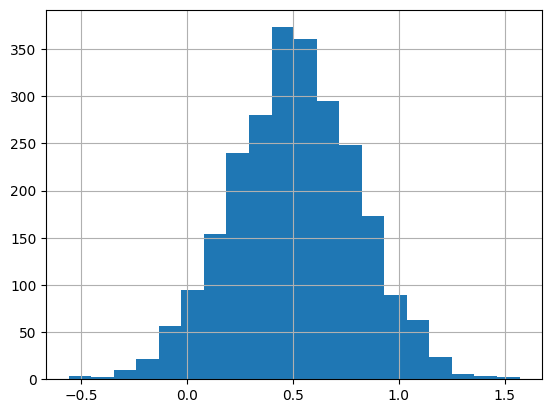

In [54]:
df['Electronics_Usage_kWh'].hist(bins=20)


<Axes: ylabel='Electronics_Usage_kWh'>

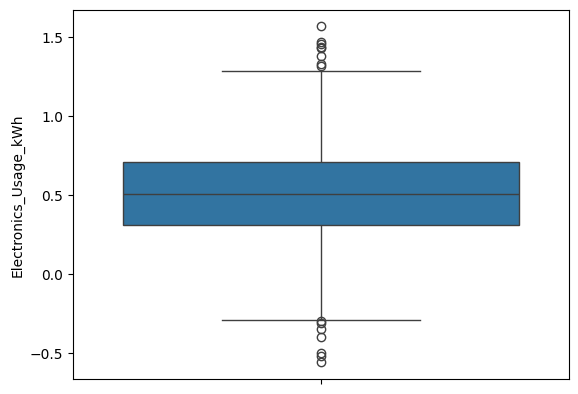

In [55]:
sns.boxplot(df['Electronics_Usage_kWh']) 

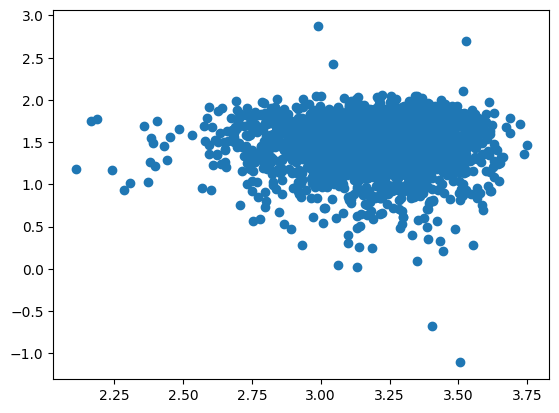

In [56]:
#bivariate analysis of two features
plt.scatter(df['Temperature_C'],df['Energy_Consumption_kWh'])

In [57]:
cor_en_temp=df[['Temperature_C','Energy_Consumption_kWh']].corr()

<Axes: >

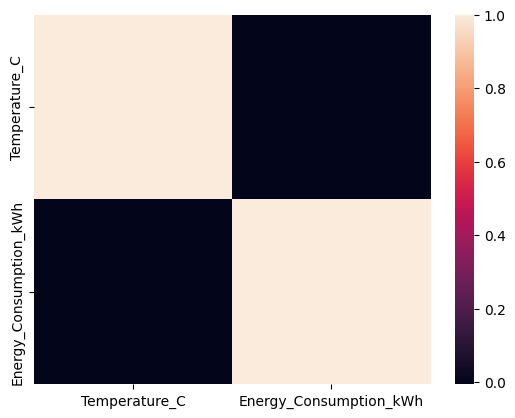

In [58]:
#using heatmap to plot the correlation between energy consumption and temperature
sns.heatmap(cor_en_temp)

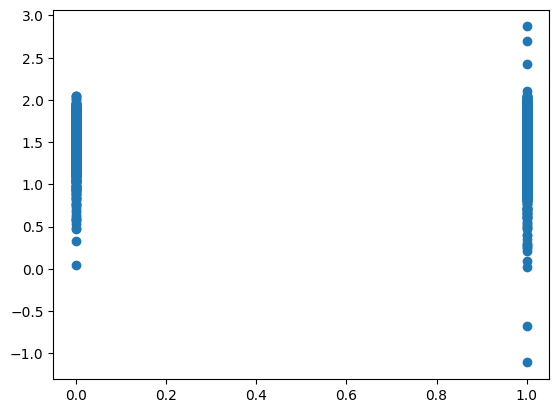

In [59]:
plt.scatter(df['Occupancy'],df['Energy_Consumption_kWh'])

In [60]:
df

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0     14-03-2024 06:00   Home_8    Lucknow                1.420696          1   
1     06-04-2024 06:00   Home_9  Hyderabad                1.740466          1   
2     30-01-2024 13:00   Home_4    Lucknow                1.184790          0   
3     05-03-2024 12:00   Home_5  Ahmedabad                0.587787          0   
4     19-01-2024 00:00  Home_10    Kolkata                1.232560          0   
...                ...      ...        ...                     ...        ...   
2495  17-02-2024 14:00   Home_5    Kolkata                1.865629          1   
2496  09-03-2024 04:00   Home_6    Chennai                1.071584          1   
2497  17-03-2024 17:00   Home_2    Lucknow                1.549688          1   
2498  06-02-2024 12:00   Home_6    Lucknow                1.585145          0   
2499  02-03-2024 01:00   Home_9  Bangalore                0.598837          1   

      Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          3.285038       46.10            1.12               0.97   
1          3.357942       45.42            0.54               1.45   
2          2.844909       57.50           -0.22               0.21   
3          3.190476       58.46            2.15               0.82   
4          3.099191       84.52            1.65               0.27   
...             ...         ...             ...                ...   
2495       2.817801       62.45            1.24               1.70   
2496       3.332919       40.91            0.96               1.26   
2497       3.429785       59.02            1.45               0.60   
2498       3.209229       60.23            0.86               0.60   
2499       3.373826       65.21            2.01              -0.02   

      Electronics_Usage_kWh  
0                      0.38  
1                      0.30  
2                      0.26  
3                      0.55  
4                      0.94  
...                     ...  
2495                   0.49  
2496                   0.21  
2497                   1.00  
2498                   0.44  
2499                  -0.18  

[2500 rows x 10 columns]

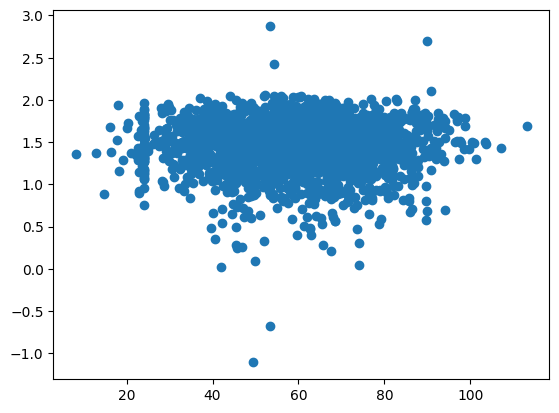

In [61]:
#Visualizing and analyzing the feature
plt.scatter(df['Humidity_%'],df['Energy_Consumption_kWh'])

In [62]:
cor_en_humid=df[['Humidity_%','Energy_Consumption_kWh']].corr()

<Axes: >

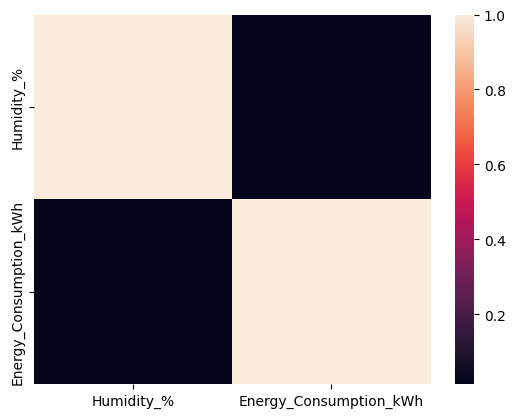

In [63]:
sns.heatmap(cor_en_humid)

C:\Users\Intel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1000 with 0 Axes>

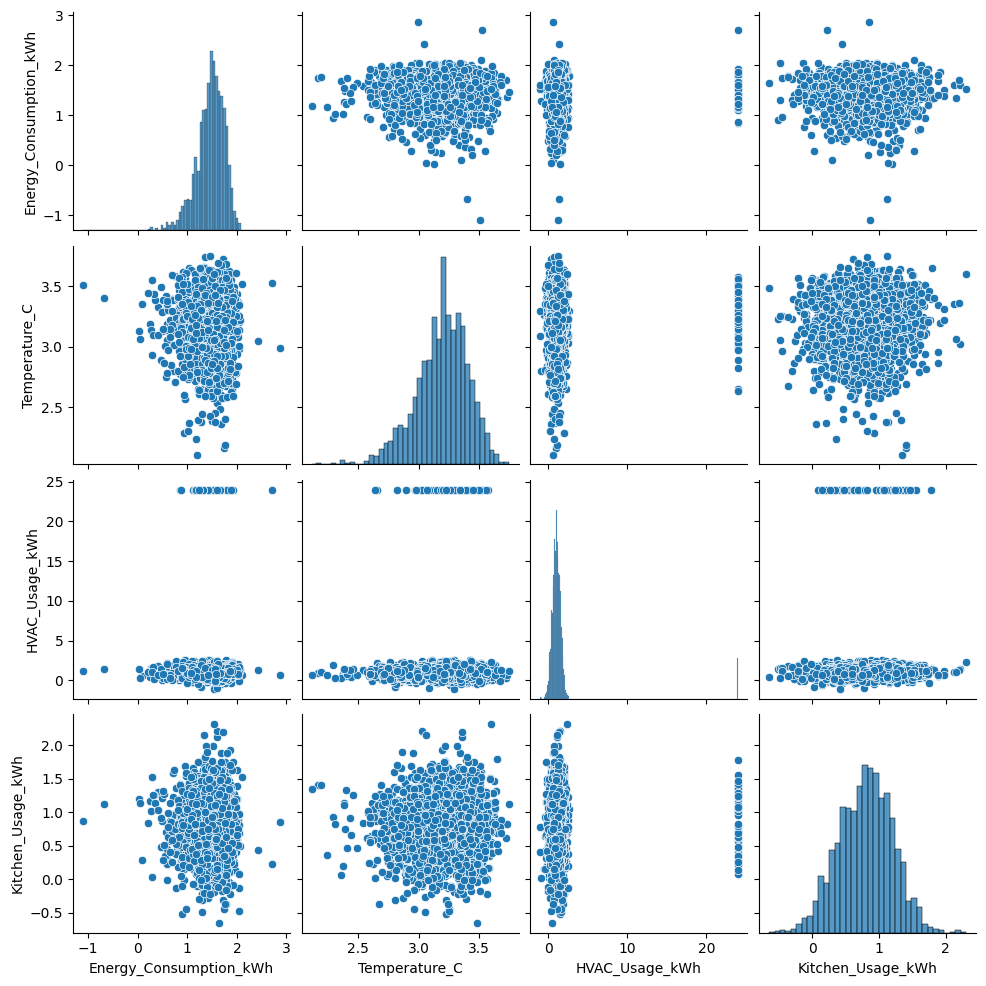

In [64]:
plt.figure(figsize=(12,10))
sns.pairplot(df[['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh']])


<Axes: >

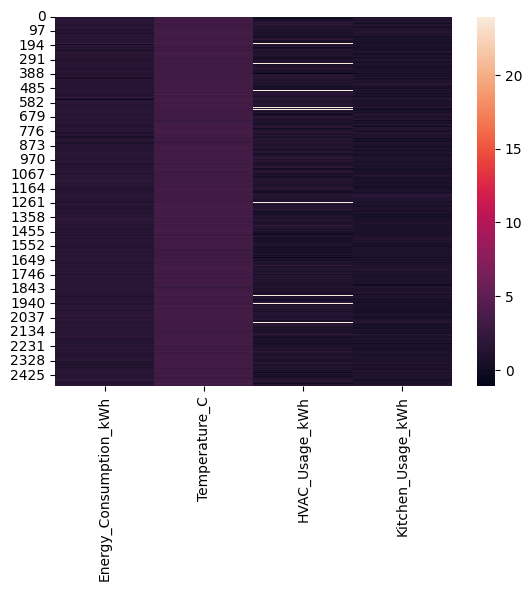

In [65]:
sns.heatmap(df[['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh']])

In [66]:
df['City'].value_counts() #How many cities


City
Lucknow      277
Hyderabad    267
Kolkata      263
Jaipur       255
Pune         253
Ahmedabad    252
Bangalore    251
Chennai      232
Delhi        226
Mumbai       224
Name: count, dtype: int64

<Axes: xlabel='City'>

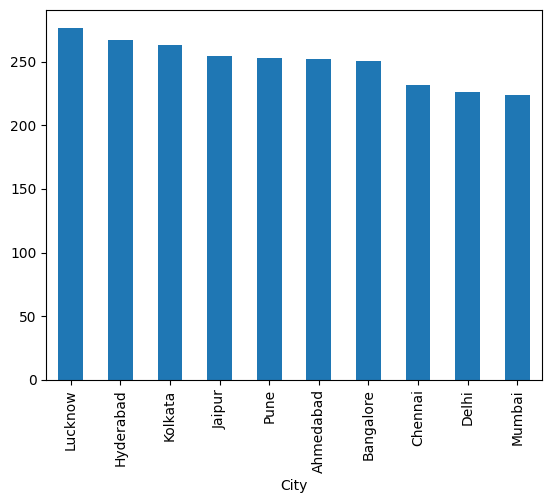

In [67]:
df['City'].value_counts().plot(kind='bar')


In [68]:
#Time series analysis
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y %H:%M')

In [69]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)


<Axes: title={'center': 'Energy consuption over time'}, xlabel='Date'>

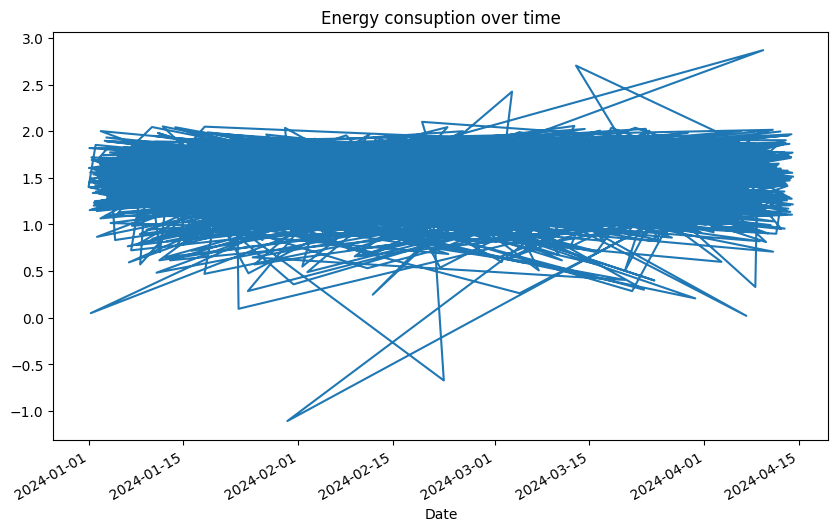

In [70]:
df['Energy_Consumption_kWh'].plot(figsize=(10,6),title='Energy consuption over time') 

<Axes: title={'center': 'Daily Energy consuption'}, xlabel='Date'>

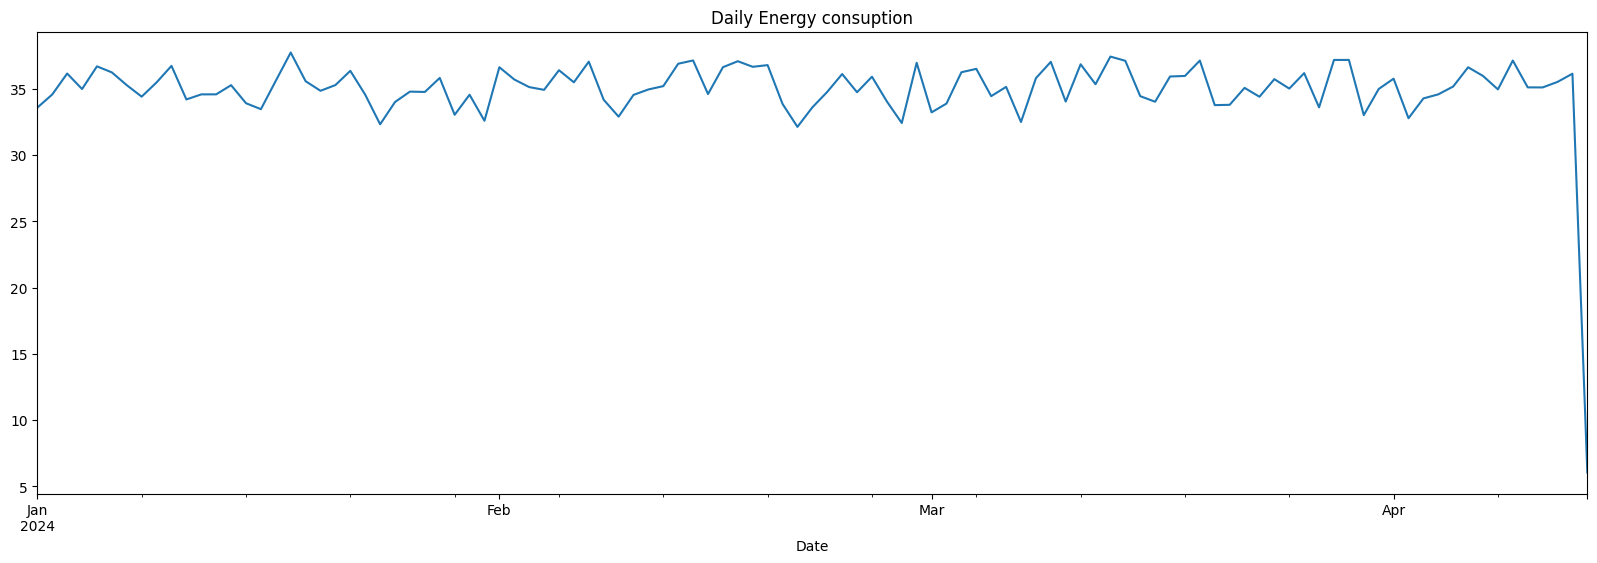

In [71]:
#Daily Energy consumption
df['Energy_Consumption_kWh'].resample('D').sum().plot(figsize=(20,6),title='Daily Energy consuption') 

<Axes: title={'center': 'Weekly Energy consuption '}, xlabel='Date'>

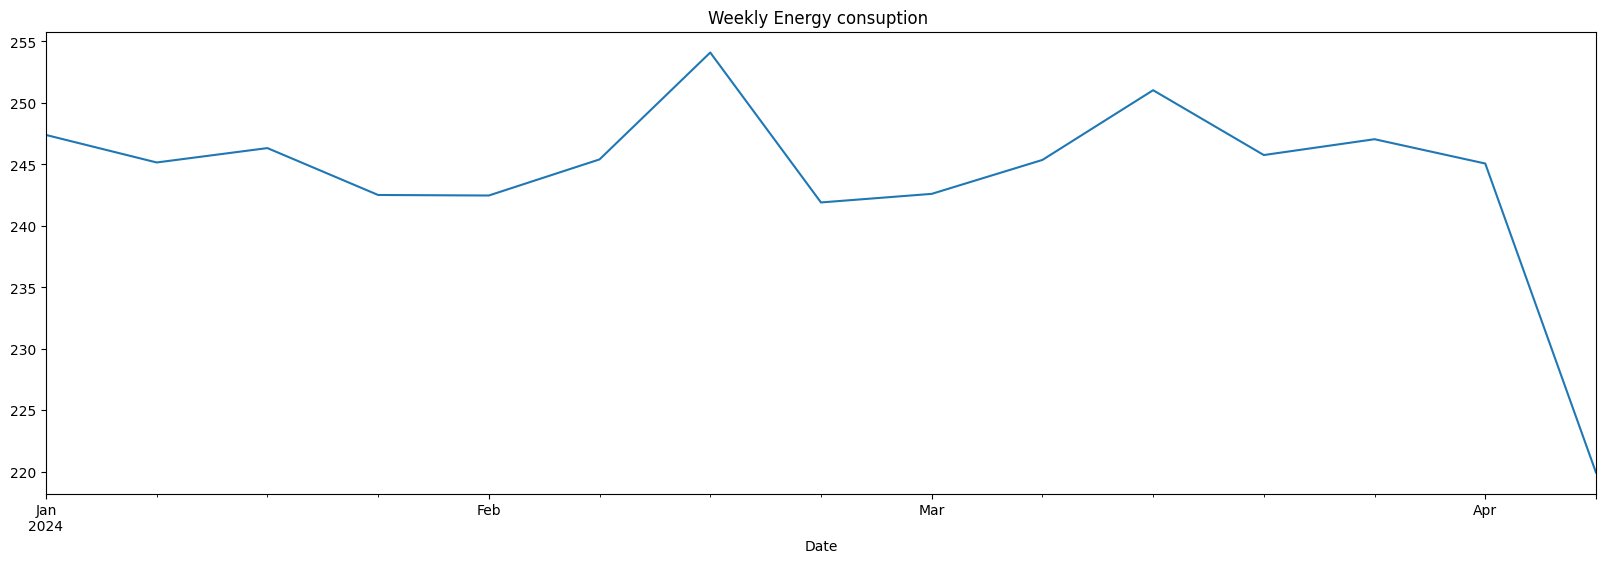

In [72]:
df['Energy_Consumption_kWh'].resample('W').sum().plot(figsize=(20,6),title='Weekly Energy consuption ') 

<Axes: title={'center': 'Monthly Energy consuption'}, xlabel='Date'>

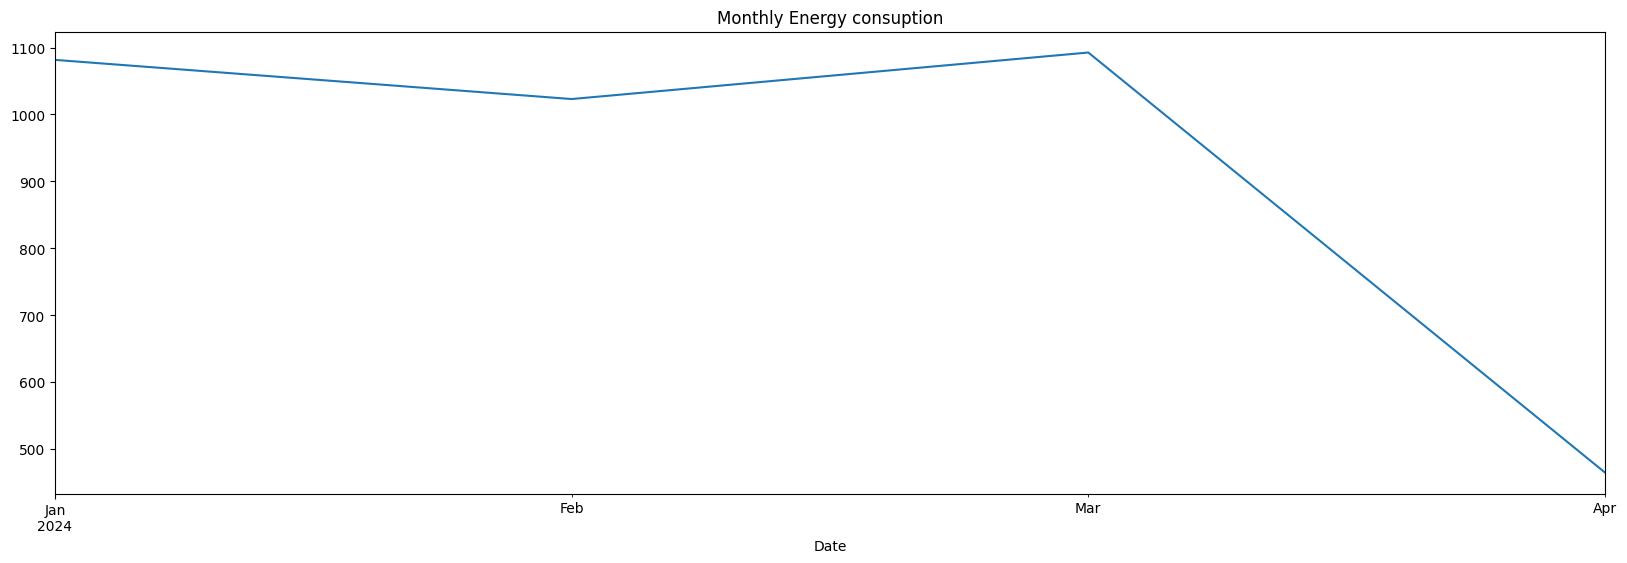

In [73]:
df['Energy_Consumption_kWh'].resample('ME').sum().plot(figsize=(20,6),title='Monthly Energy consuption') 

In [74]:
#Exponential Moving Average
daily_energy=df['Energy_Consumption_kWh'].resample('D').sum()

In [75]:
# Calculate a 7-day EMA
ema_7 = daily_energy.ewm(span=7, adjust=False).mean()


In [76]:
# Calculate a 30-day EMA
ema_30 = daily_energy.ewm(span=30, adjust=False).mean()


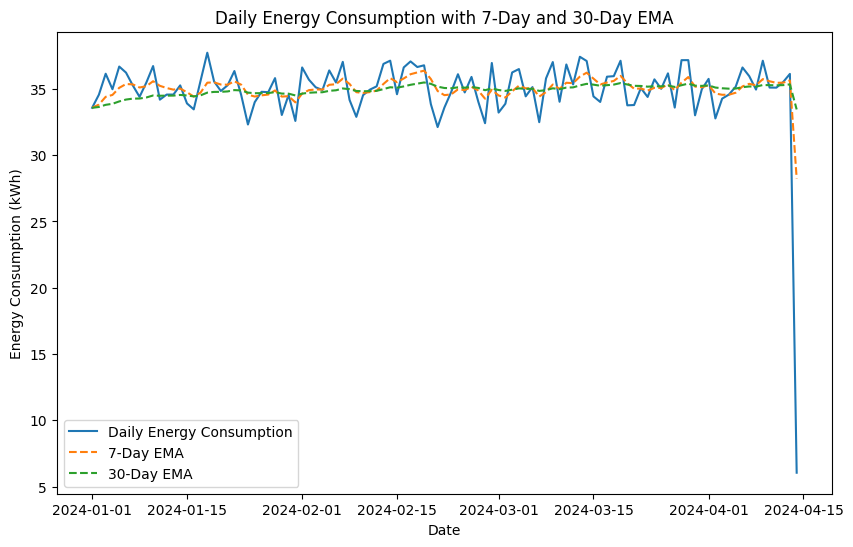

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot original daily energy consumption
plt.plot(daily_energy, label='Daily Energy Consumption')

# Plot 7-day EMA
plt.plot(ema_7, label='7-Day EMA', linestyle='--')

# Plot 30-day EMA
plt.plot(ema_30, label='30-Day EMA', linestyle='--')

plt.title('Daily Energy Consumption with 7-Day and 30-Day EMA')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Date')
plt.legend()
plt.show()


In [78]:
#Visualizing how much is the energy consumed in a house with respect to occupants
df['Energy_per_occu']=df['Energy_Consumption_kWh']/df['Occupancy']

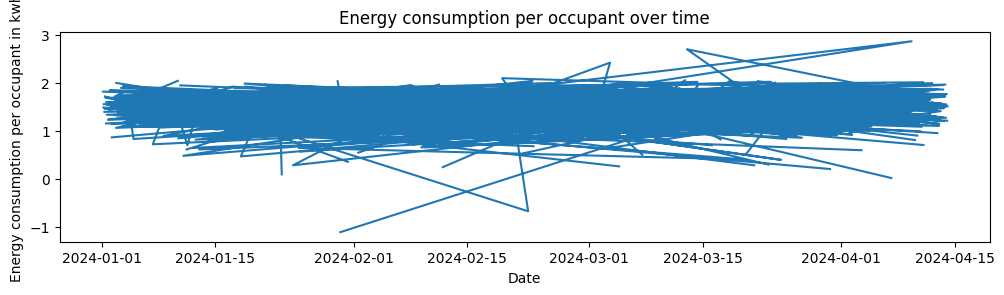

In [79]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(df.index,df['Energy_per_occu'],label='energy consumption per occupant')
plt.title('Energy consumption per occupant over time')
plt.xlabel('Date')
plt.ylabel('Energy consumption per occupant in kwh')
plt.show()

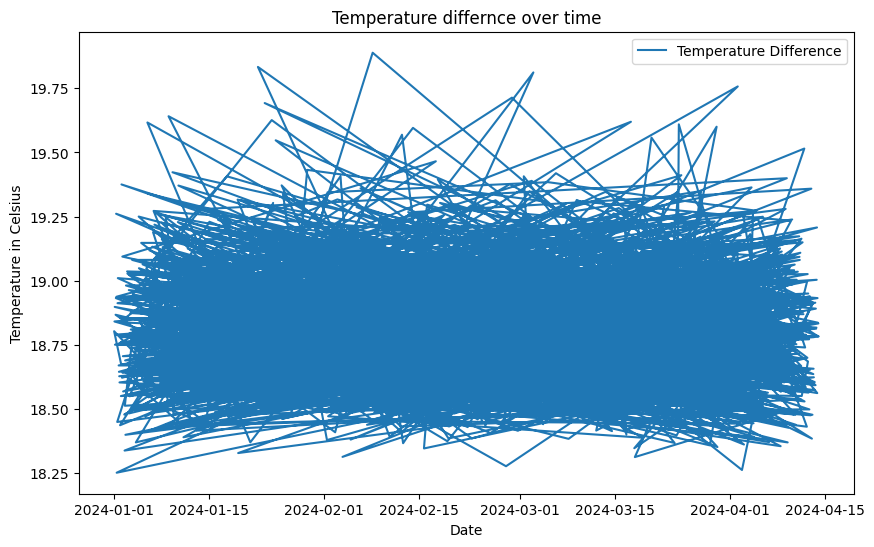

In [80]:
#temperature difference
indoor_temp=22
df['temp_diff']=indoor_temp-df['Temperature_C']

plt.figure(figsize=(10,6))
plt.plot(df.index,df['temp_diff'],label='Temperature Difference')
plt.title('Temperature differnce over time')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Date')
plt.legend()
plt.show()

In [81]:
#correlation analysis
corr_colum=['Energy_Consumption_kWh', 'Temperature_C','Occupancy']
corr_matrix=df[corr_colum].corr()

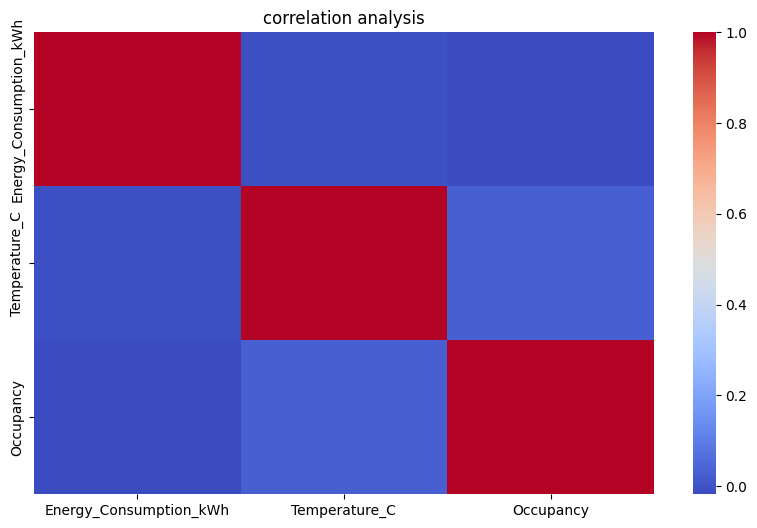

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('correlation analysis')
plt.show()


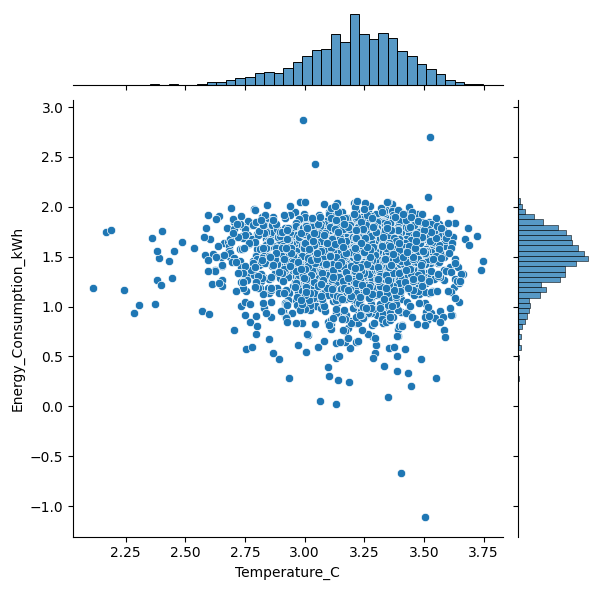

In [83]:
sns.jointplot(x='Temperature_C',y='Energy_Consumption_kWh',data=df,kind='scatter')
plt.show()

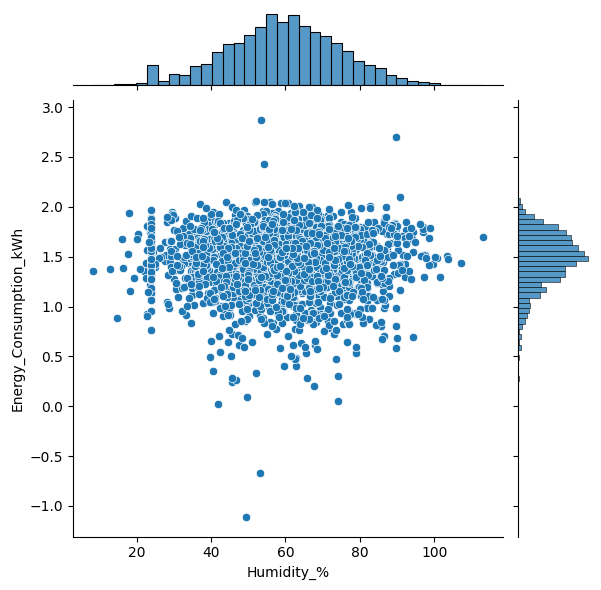

In [84]:
sns.jointplot(x='Humidity_%',y='Energy_Consumption_kWh',data=df,kind='scatter')
plt.show()

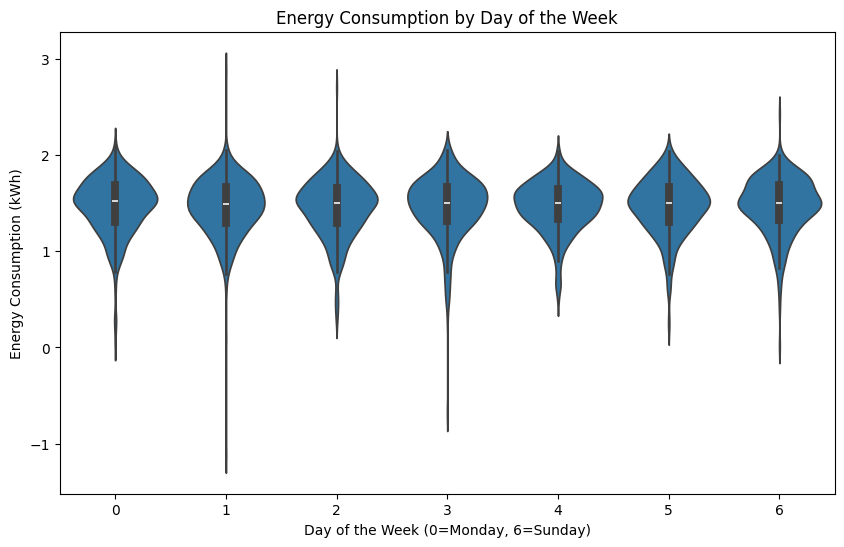

In [85]:
df['Day_of_Week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday

# Violin plot: Energy Consumption by Day of the Week
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_of_Week', y='Energy_Consumption_kWh', data=df)
plt.title('Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

In [86]:
#Interactive plots to understand the energy consumption over time
import plotly.express as px
fig=px.line(df,x=df.index,y='Energy_Consumption_kWh',title='Energy conusption over time')
fig.show()

Week 3:Machine Learning and Model Selection
Task 1:
spliting thr data
        

In [87]:
df=df.reset_index()

In [88]:
df

Date  Home_ID       City  Energy_Consumption_kWh  \
0    2024-03-14 06:00:00   Home_8    Lucknow                1.420696   
1    2024-04-06 06:00:00   Home_9  Hyderabad                1.740466   
2    2024-01-30 13:00:00   Home_4    Lucknow                1.184790   
3    2024-03-05 12:00:00   Home_5  Ahmedabad                0.587787   
4    2024-01-19 00:00:00  Home_10    Kolkata                1.232560   
...                  ...      ...        ...                     ...   
2495 2024-02-17 14:00:00   Home_5    Kolkata                1.865629   
2496 2024-03-09 04:00:00   Home_6    Chennai                1.071584   
2497 2024-03-17 17:00:00   Home_2    Lucknow                1.549688   
2498 2024-02-06 12:00:00   Home_6    Lucknow                1.585145   
2499 2024-03-02 01:00:00   Home_9  Bangalore                0.598837   

      Occupancy  Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0             1       3.285038       46.10            1.12               0.97   
1             1       3.357942       45.42            0.54               1.45   
2             0       2.844909       57.50           -0.22               0.21   
3             0       3.190476       58.46            2.15               0.82   
4             0       3.099191       84.52            1.65               0.27   
...         ...            ...         ...             ...                ...   
2495          1       2.817801       62.45            1.24               1.70   
2496          1       3.332919       40.91            0.96               1.26   
2497          1       3.429785       59.02            1.45               0.60   
2498          0       3.209229       60.23            0.86               0.60   
2499          1       3.373826       65.21            2.01              -0.02   

      Electronics_Usage_kWh  Energy_per_occu  temp_diff  Day_of_Week  
0                      0.38         1.420696  18.714962            3  
1                      0.30         1.740466  18.642058            5  
2                      0.26              inf  19.155091            1  
3                      0.55              inf  18.809524            1  
4                      0.94              inf  18.900809            4  
...                     ...              ...        ...          ...  
2495                   0.49         1.865629  19.182199            5  
2496                   0.21         1.071584  18.667081            5  
2497                   1.00         1.549688  18.570215            6  
2498                   0.44              inf  18.790771            1  
2499                  -0.18         0.598837  18.626174            5  

[2500 rows x 13 columns]

In [89]:
#spliting the data with respect to time-series analysis

In [90]:
# Define the split date
split_date = '2024-04-01'

# Split the data based on the date
train = df[df['Date'] < split_date]
test = df[df['Date'] >= split_date]

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)


Training data shape: (2184, 13)
Testing data shape: (316, 13)


In [91]:
# Convert 'Date' to numeric values 
train.loc[:,'Date_numeric'] = train['Date'].map(pd.Timestamp.toordinal)
test.loc[:,'Date_numeric'] = test['Date'].map(pd.Timestamp.toordinal)

# Define features and target
X_train = train[['Date_numeric']]  # Features (date as numeric)
y_train = train['Energy_Consumption_kWh']  # Target (energy consumption, for example)

X_test = test[['Date_numeric']]
y_test = test['Energy_Consumption_kWh']


C:\Users\Intel\AppData\Local\Temp\ipykernel_12324\24524066.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Intel\AppData\Local\Temp\ipykernel_12324\24524066.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
#model fitting
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [93]:
#Evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Square Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean Square Error: 0.08226796242125488
R2 score: 0.00019561551959634826


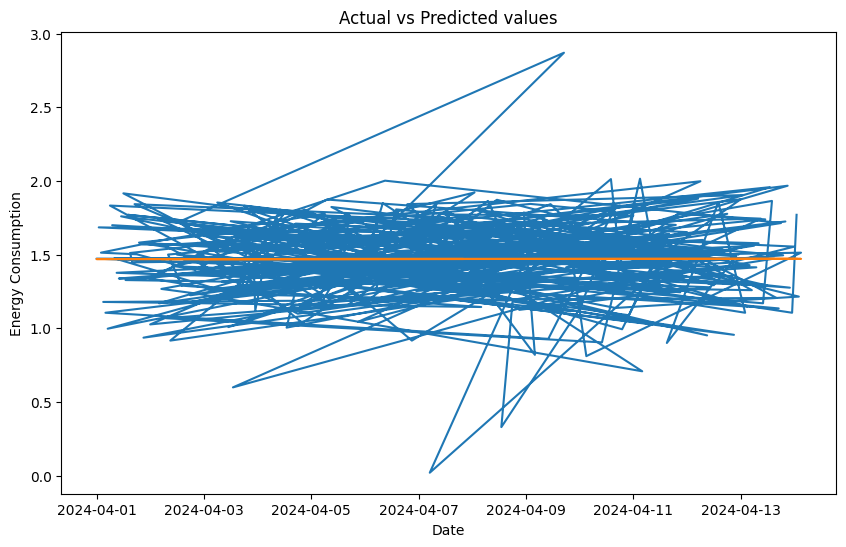

In [94]:
#visualizing
plt.figure(figsize=(10,6))
plt.plot(test['Date'],y_test,label="Actual")
plt.plot(test['Date'],y_pred,label="Predicted")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted values")
plt.show()

In [95]:
res=y_test-y_pred
res


1       0.270524
21     -0.142748
24     -0.059075
31      0.135368
33     -0.202517
          ...   
2443   -0.566202
2471   -0.401312
2474   -0.175693
2480   -0.365522
2490    0.298957
Name: Energy_Consumption_kWh, Length: 316, dtype: float64

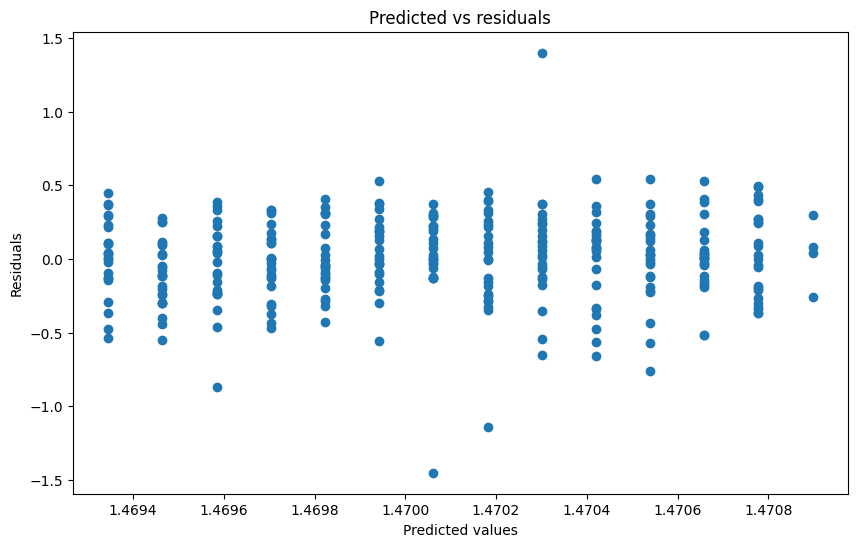

In [96]:

plt.figure(figsize=(10,6))
plt.scatter(y_pred,res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted vs residuals")
plt.show()





In [97]:
importance=model.coef_
for i,v in enumerate(importance):
    print(f'Feature:{X_train.columns[i]},score:{v}')

Feature:Date_numeric,score:0.00011943020652129854


In [98]:
#Predictive system
#As the data is continous rsrndom forest regressor was a better model to know the effiecny of the entities
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:",mse)
print("R2_Score:",r2)



Mean squared error: 0.08226796242125488
R2_Score: 0.00019561551959634826


In [99]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(pred_df.head())


      Actual  Predicted
1   1.740466   1.469942
21  1.327075   1.469823
24  1.410987   1.470062
31  1.605430   1.470062
33  1.266948   1.469465


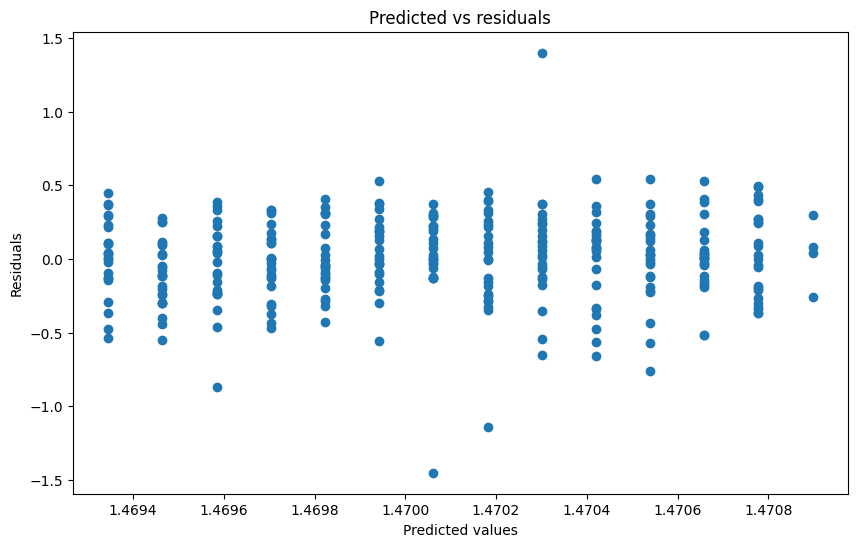

In [100]:
#visualize
res=y_test-y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted vs residuals")
plt.show()

